['scAHi-C', '2018-Tan', '2021-Tan', '2017-Flyamer', '2017-Nagano', '2023-Qu', '2019-Li', '2017-Stevens', '2013-Nagano', '2017-Ramani']


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


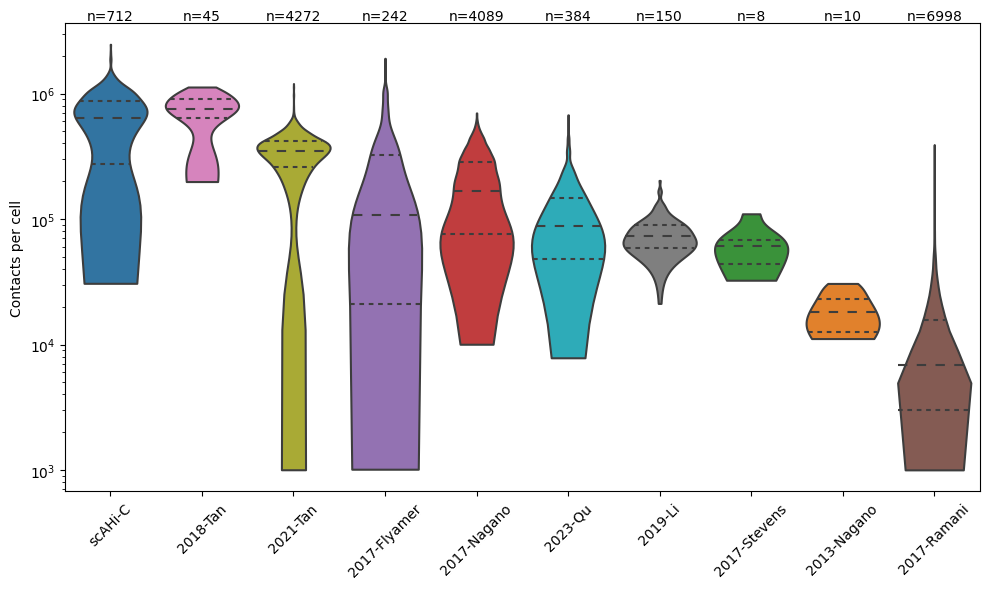

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatter
from statannotations.Annotator import Annotator
from scipy import stats
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('多个技术contacts统计.txt', sep='\t')

# 计算每个项目的均值并按降序排列，排除 'scAHi-C'
mean_order = data.groupby('project')['contacts'].mean().sort_values(ascending=False).index
mean_order = mean_order[mean_order != 'scAHi-C']  # 排除 scAHi-C

# 将 'scAHi-C' 添加到首位
mean_order = ['scAHi-C'] + list(mean_order)
print(mean_order)
# 样本量数据，从左到右对应每个技术，需根据新的顺序重新排列
sample_sizes = {'scAHi-C': 'n=712', '2013-Nagano': 'n=10', '2017-Stevens': 'n=8', 
                '2017-Nagano': 'n=4089', '2017-Flyamer': 'n=242', '2017-Ramani': 'n=6998',
                '2018-Tan': 'n=45', '2019-Li': 'n=150', '2021-Tan': 'n=4272', '2023-Qu': 'n=384'}

# 为每个项目指定固定的颜色
project_colors = {
    'scAHi-C': '#1f77b4',      # 蓝色
    '2013-Nagano': '#ff7f0e',  # 橙色
    '2017-Stevens': '#2ca02c',  # 绿色
    '2017-Nagano': '#d62728',  # 红色
    '2017-Flyamer': '#9467bd', # 紫色
    '2017-Ramani': '#8c564b',  # 棕色 #####
    '2018-Tan': '#e377c2',     # 粉色
    '2019-Li': '#7f7f7f',      # 灰色 #####
    '2021-Tan': '#bcbd22',     # 黄色
    '2023-Qu': '#17becf'       # 青色
}

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(10, 6))  # 增加宽度
sns.violinplot(x='project', y='contacts', data=data, 
               order=mean_order,  palette=project_colors,  # 使用自定义的颜色# 根据均值排序后的顺序
               ax=ax, inner="quart", cut=0, scale="width")

# 设置纵坐标为对数刻度
ax.set_yscale('log')

# 旋转 x 轴标签
plt.xticks(rotation=45)
plt.ylabel('Contacts per cell')
plt.xlabel('')

# 在柱状图上标记样本量
for i, project in enumerate(mean_order):
    ax.text(i, ax.get_ylim()[1], sample_sizes[project], ha='center', va='bottom')

# 调整布局以避免标签被剪裁
plt.tight_layout()  

plt.savefig('project_contacts_log_scale_with_sample_size_ordered.svg', dpi=300, bbox_inches='tight', transparent=True)


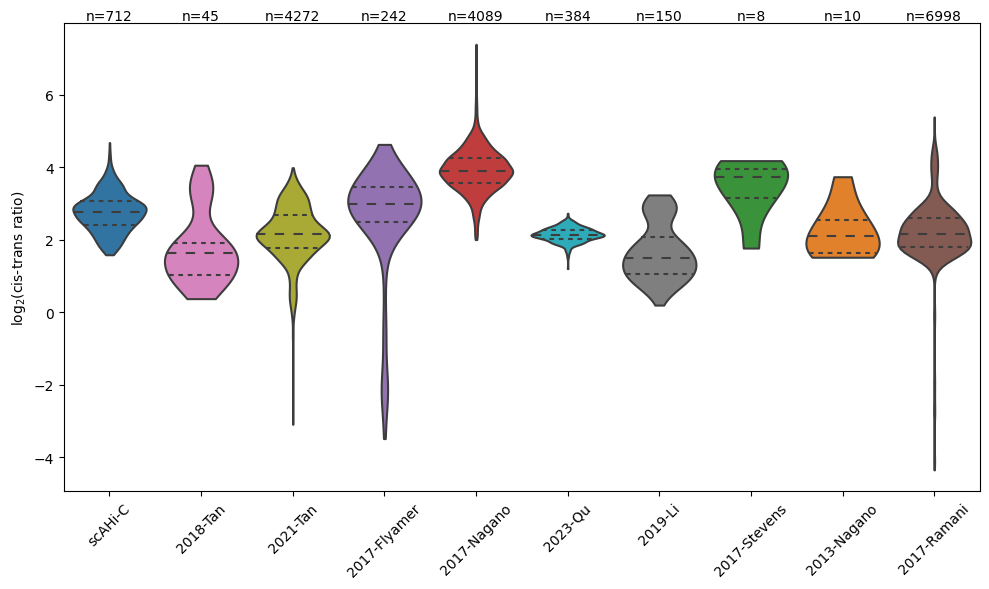

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
data = pd.read_csv('多个技术contacts统计.txt', sep='\t')

# 对 'cis_to_trans' 列进行 log2 转换，并处理 0 或负值
data['log2_cis_to_trans'] = np.log2(data['cis_to_trans'].replace(0, np.nan))

# 计算每个项目的均值并按降序排列，排除 'scAHi-C'
#mean_order = data.groupby('project')['log2_cis_to_trans'].mean().sort_values(ascending=False).index
#mean_order = mean_order[mean_order != 'scAHi-C']  # 排除 scAHi-C

# 将 'scAHi-C' 添加到首位
#mean_order = ['scAHi-C'] + list(mean_order)

# 样本量数据，从左到右对应每个技术，需根据新的顺序重新排列
sample_sizes = {'scAHi-C': 'n=712', '2013-Nagano': 'n=10', '2017-Stevens': 'n=8', 
                '2017-Nagano': 'n=4089', '2017-Flyamer': 'n=242', '2017-Ramani': 'n=6998',
                '2018-Tan': 'n=45', '2019-Li': 'n=150', '2021-Tan': 'n=4272', '2023-Qu': 'n=384'}

# 为每个项目指定固定的颜色
project_colors = {
    'scAHi-C': '#1f77b4',      # 蓝色
    '2013-Nagano': '#ff7f0e',  # 橙色
    '2017-Stevens': '#2ca02c',  # 绿色
    '2017-Nagano': '#d62728',  # 红色
    '2017-Flyamer': '#9467bd', # 紫色
    '2017-Ramani': '#8c564b',  # 棕色
    '2018-Tan': '#e377c2',     # 粉色
    '2019-Li': '#7f7f7f',      # 灰色
    '2021-Tan': '#bcbd22',     # 黄色
    '2023-Qu': '#17becf'       # 青色
}

# 调整图形的宽度
fig, ax = plt.subplots(figsize=(10, 6))  # 增加宽度以适应样本量标注

# 绘制小提琴图并按均值排序
sns.violinplot(x='project', y='log2_cis_to_trans', data=data, 
               order=mean_order, palette=project_colors,  # 按均值排序后的顺序
               ax=ax, inner="quart", cut=0, scale="width")

# 旋转 x 轴标签
plt.xticks(rotation=45)
plt.ylabel('log$_{2}$(cis-trans ratio)')
plt.xlabel('')

# 在柱状图上标记样本量
for i, project in enumerate(mean_order):
    ax.text(i, ax.get_ylim()[1], sample_sizes[project], ha='center', va='bottom')

# 调整布局以避免标签被剪裁
plt.tight_layout()  

plt.savefig('project_cis_to_trans_with_sample_size_ordered.svg', dpi=300, bbox_inches='tight', transparent=True)
#display(SVG(filename='project_cis_to_trans_with_sample_size_ordered.svg'))

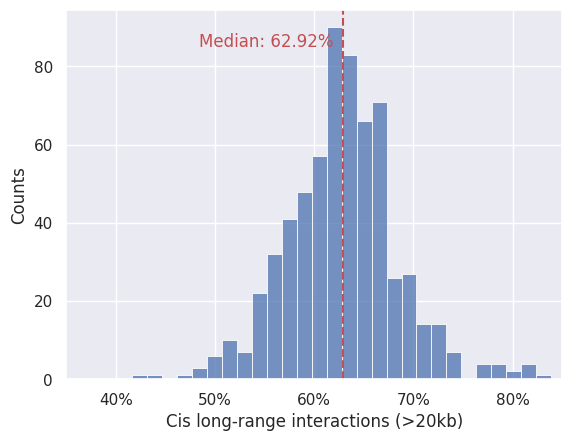

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取txt文件并跳过标题行
with open('cis_longRange_ratio.txt', 'r') as f:
    next(f)  # 跳过标题行
    lines = f.readlines()

# 提取正确的数据列（假设第4列索引为3）
data = []
for line in lines:
    cols = line.strip().split()
    try:
        data.append(float(cols[3]))  # 确认这是正确的比率列
    except (IndexError, ValueError) as e:
        print(f"处理行时出错：{line.strip()}，错误：{e}")

# 计算中位数
median_value = np.median(data)

# 创建图表
#sns.set_theme()
fig, ax = plt.subplots()

# 绘制直方图并添加核密度估计
#sns.histplot(data, bins=50, kde=True, ax=ax)
sns.histplot(data)
# 设置横坐标为百分比格式
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# 添加中位线并动态调整标注位置
ax.axvline(median_value, color='r', linestyle='--')

# 根据中位数位置决定标注方向
x_range = 0.85 - 0.35
text_offset = x_range * 0.02  # 动态偏移量
if median_value > (0.35 + 0.85)/2:
    text_pos = median_value - text_offset
    ha = 'right'
else:
    text_pos = median_value + text_offset
    ha = 'left'

ax.text(text_pos, ax.get_ylim()[1]*0.9, 
        f'Median: {median_value*100:.2f}%', 
        color='r', ha=ha)

# 设置坐标轴标签
ax.set_xlabel('Cis long-range interactions (>20kb)')  # 修正拼写错误
ax.set_ylabel('Counts')

# 设置坐标轴范围
ax.set_xlim(0.35, 0.85)

# 保存图表

plt.savefig('Cis_long-range_interactions.svg', dpi=300, bbox_inches='tight', transparent=True)
#display(SVG(filename='Cis_long-range_interactions.svg'))